In [2]:
## Chemin vers l'espace de travail
## ici le dossier Data -- Pensez à bien indiquer cela avec RStudio 
setwd("../Data")

In [3]:
getwd()

[1] "/home/thierry/works/wdM2/UE4/UE4_Climat_2024/Data"

In [4]:
###########################################################
## Lecture et mise en forme des données drias
###########################################################

## Il faudra que vous ajustiez cela en fonction de vos données


driasfile <- "tasminAdjusttasmaxAdjustprtotAdjustevspsblpotAdjust_France_CNRM-CERFACS-CNRM-CM5_CNRM-ALADIN63_Historical_METEO-FRANCE_ADAMONT-France_SAFRAN_day_20040101-20041231.txt"
mydrias<-read.csv(driasfile, header = FALSE, sep=",", skip=60) ## Attention l'argument skip peut varier en fonction des variables récupérées
head(mydrias)
tail(mydrias)


,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,9378,46.2218,3.94455,307,01/01/2004,7.21,15.04,0.781,0.919
2,9378,46.2218,3.94455,307,01/02/2004,6.15,14.89,0.000,0.662
3,9378,46.2218,3.94455,307,01/03/2004,5.08,5.96,0.000,0.483
4,9378,46.2218,3.94455,307,01/04/2004,0.08,8.51,0.000,0.407
5,9378,46.2218,3.94455,307,01/05/2004,1.39,8.90,0.000,0.948
6,9378,46.2218,3.94455,307,01/06/2004,1.05,10.28,0.000,0.296


,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
181897,13520,48.3146,3.46945,169,12/26/2004,5.34,10.58,0.000,0.390
181898,13520,48.3146,3.46945,169,12/27/2004,3.94,10.28,3.640,0.357
181899,13520,48.3146,3.46945,169,12/28/2004,5.15,5.92,0.974,0.359
181900,13520,48.3146,3.46945,169,12/29/2004,2.48,8.95,0.565,0.477
181901,13520,48.3146,3.46945,169,12/30/2004,4.57,7.11,0.283,0.278
181902,13520,48.3146,3.46945,169,12/31/2004,4.21,8.82,0.000,0.517


In [5]:
## Nom ce colonnes à adapter en fonction de vos données
colnames(mydrias) <- c("idpt","lat","lon","alti","date","Tn","Tx","RR","ETP")
head(mydrias)
dim(mydrias)

,idpt,lat,lon,alti,date,Tn,Tx,RR,ETP
,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,9378,46.2218,3.94455,307,01/01/2004,7.21,15.04,0.781,0.919
2,9378,46.2218,3.94455,307,01/02/2004,6.15,14.89,0.000,0.662
3,9378,46.2218,3.94455,307,01/03/2004,5.08,5.96,0.000,0.483
4,9378,46.2218,3.94455,307,01/04/2004,0.08,8.51,0.000,0.407
5,9378,46.2218,3.94455,307,01/05/2004,1.39,8.90,0.000,0.948
6,9378,46.2218,3.94455,307,01/06/2004,1.05,10.28,0.000,0.296


[1] 181902      9

In [6]:
###############################################################
## Sauvegarde l'ensemble des données Drias au format RData
## une fois réalisé les données pourrons directement être chargé avec la fonction load
dim(mydrias)
save(mydrias, file="mydrias.RData")
#### Recharger les données au format RData se fait avec la fonction
load("mydrias.RData")

[1] 181902      9

In [6]:
## Combien de points de grille ?
mydrias.pts <- unique(mydrias[,c("idpt","lon","lat","alti")])
str(mydrias.pts)
dim(mydrias.pts)
## Sauvegarde les points de grille au format csv -> pour récupération avec QGIS
write.csv(mydrias.pts,file="ptsdrias.csv",quote=FALSE,row.names=FALSE)

## Vérifier avec QGIS que les points du fichier ptsdrias.csv
## couvrent la Bourgogne


'data.frame':	497 obs. of  4 variables:
 $ idpt: int  9378 9379 9380 9381 9382 9386 9521 9522 9523 9524 ...
 $ lon : num  3.94 4.05 4.15 4.26 4.36 ...
 $ lat : num  46.2 46.2 46.2 46.2 46.2 ...
 $ alti: int  307 298 388 362 489 192 293 286 405 405 ...


[1] 497   4

In [7]:
#####################################################################
##               Evaluation des données DRIAS
#####################################################################
## Calcul de la climatologie des données Drias au pas de temps mensuel
## pour comparaison avec les données observées des stations Météo France
## 
#####################################################################

library(xts) ## charge le package xts

## calcul des moyennes mensuelles toutes années confondus

## initalise les objets pour l'ensemble des résultats
resuTn <- c(); resuTx <- c(); resuRR <- c()

## première boucle sur les 497 points Drias
for(i in 1:nrow(mydrias.pts)){
    tmp <- subset(mydrias,mydrias$idpt==mydrias.pts[i,"idpt"])
    mydate <- as.Date(as.character(tmp$date),"%m/%d/%Y")
    tmpxts <- xts(tmp[,c("idpt","Tn","Tx","RR")], order.by=mydate)
    ## initialise objet vide pour les moyennes mensuelles
    rmoiTn <- c();rmoiTx <- c();rmoiRR <- c()
    
    ## Deuxième boucle sur les mois
    for(j in 1:12){
        moi <- tmpxts[.indexmon(tmpxts) %in% (j-1)]
        rmoiTn <- cbind(rmoiTn,colMeans(moi[,"Tn"]))
        rmoiTx <- cbind(rmoiTx,colMeans(moi[,"Tx"]))
        tmprr <- apply.monthly(moi[,"RR"],sum)
        rmoiRR <- cbind(rmoiRR,colMeans(tmprr))
        }
    resuTn <- rbind(resuTn,rmoiTn)
    resuTx <- rbind(resuTx,rmoiTx)
    resuRR <- rbind(resuRR,rmoiRR)
}

Le chargement a nécessité le package : zoo


Attachement du package : ‘zoo’


Les objets suivants sont masqués depuis ‘package:base’:

    as.Date, as.Date.numeric




In [10]:
## Ajoute les noms des colonnes
colnames(resuTn) <- month.abb
colnames(resuTx) <- month.abb
colnames(resuRR) <- month.abb
##################################################################
dim(resuRR)
head(resuRR)
#str(mydrias)

[1] 497  12

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
RR,47.481,67.583,107.688,28.029,154.300,48.761,43.848,51.392,118.738,57.591,52.243,42.238
RR,47.308,67.115,107.011,27.943,153.919,48.573,43.662,51.196,118.547,57.422,52.011,42.254
RR,62.176,71.116,102.750,26.541,166.334,57.782,59.654,43.487,128.143,52.442,45.970,48.646
RR,65.227,65.449,90.159,22.818,144.154,50.246,62.291,36.189,107.827,47.311,45.132,41.245
RR,66.134,65.692,100.051,24.057,149.391,52.962,65.787,38.301,113.033,49.458,47.485,44.579
RR,56.879,75.259,79.632,15.864,119.616,25.555,38.417,21.263,127.714,83.306,60.222,48.223


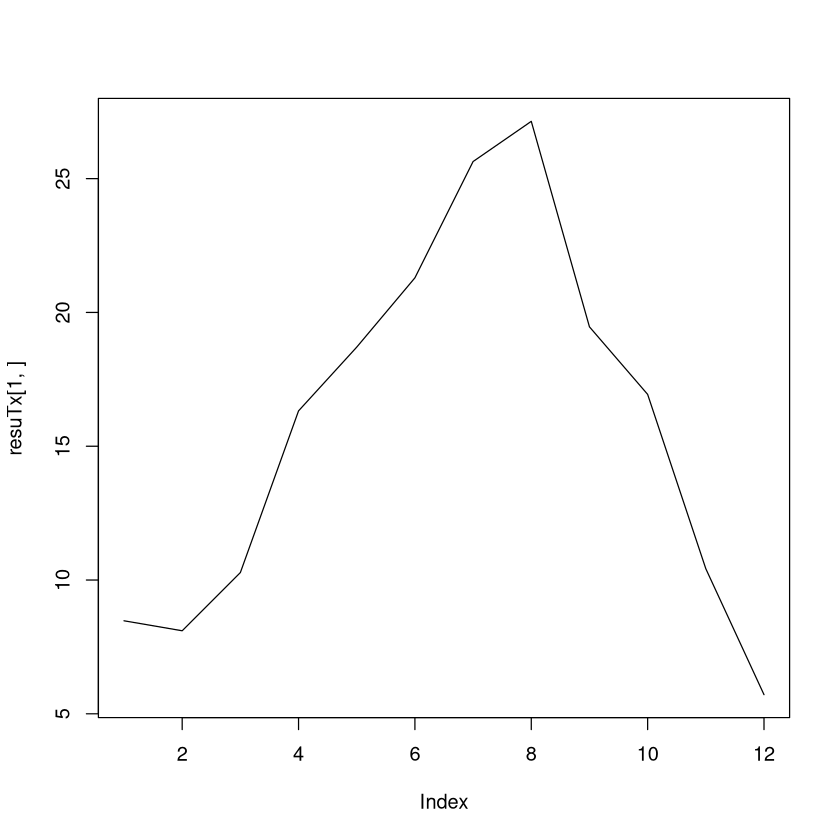

In [17]:
######################################################################
## Vérifier avec un graphique que les résultats pour la température
## sont cohérents
######################################################################

plot(resuTx[1,], type="l") ## Trace le cycle annuel des Tx pour la 1er point de grille


In [18]:
######################################################################
## Sauvegarde des données DRIAS -- moyennes mensuelles
#####################################################################

save(resuTn,resuTx,resuRR,mydrias.pts,
     file = "DriasData_mois.RData")
